In [21]:
library(gapminder)
library(dplyr)
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 4.1.2"


In [2]:
gapminder <- gapminder

In [3]:
head(gapminder)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [4]:
summary(gapminder)

        country        continent        year         lifeExp     
 Afghanistan:  12   Africa  :624   Min.   :1952   Min.   :23.60  
 Albania    :  12   Americas:300   1st Qu.:1966   1st Qu.:48.20  
 Algeria    :  12   Asia    :396   Median :1980   Median :60.71  
 Angola     :  12   Europe  :360   Mean   :1980   Mean   :59.47  
 Argentina  :  12   Oceania : 24   3rd Qu.:1993   3rd Qu.:70.85  
 Australia  :  12                  Max.   :2007   Max.   :82.60  
 (Other)    :1632                                                
      pop              gdpPercap       
 Min.   :6.001e+04   Min.   :   241.2  
 1st Qu.:2.794e+06   1st Qu.:  1202.1  
 Median :7.024e+06   Median :  3531.8  
 Mean   :2.960e+07   Mean   :  7215.3  
 3rd Qu.:1.959e+07   3rd Qu.:  9325.5  
 Max.   :1.319e+09   Max.   :113523.1  
                                       

##  Descriptive Statistics

#### 1. Measures of Central Tendancy (Mean, Median and Mode)

In [5]:
gapminder %>%  filter(country == 'Zambia') %>% 
summarize(mean_population = mean(lifeExp))

mean_population
<dbl>
45.99633


In [6]:
gapminder %>% filter(country == 'Zambia') %>% 
summarize(median_lifeExp = median(lifeExp))

median_lifeExp
<dbl>
46.0615


In [7]:
mode <- function(x) {
  u <- unique(x)
  tab <- tabulate(match(x, u))
  u[tab == max(tab)]
}

gapminder%>% filter(year == 2007) %>% group_by(country) %>% summarize(mode(gdpPercap))


country,mode(gdpPercap)
<fct>,<dbl>
Afghanistan,974.5803
Albania,5937.0295
Algeria,6223.3675
Angola,4797.2313
Argentina,12779.3796
Australia,34435.3674
Austria,36126.4927
Bahrain,29796.0483
Bangladesh,1391.2538


## Measures of Dispersion or Variation (Variance, Standard Deviation and Range)

In [16]:
gapminder %>% group_by(continent) %>% summarize(range = (max(pop) - min(pop)))

continent,range
<fct>,<int>
Africa,134971153
Americas,300477097
Asia,1318562649
Europe,82253034
Oceania,18439382


In [9]:
gapminder%>% filter(country == 'Zambia') %>% group_by(country) %>% summarize(var(gdpPercap))

country,var(gdpPercap)
<fct>,<dbl>
Zambia,61253.77


In [10]:
gapminder%>% filter(country == 'Zambia') %>% group_by(country) %>% summarize(sd(gdpPercap))

country,sd(gdpPercap)
<fct>,<dbl>
Zambia,247.495


## Measures of Position

In [18]:
quantile(gapminder$pop, 0.25)

25% 
2793664

In [19]:
quantile(gapminder$pop, 0.75)

75% 
19585222

In [20]:
IQR(gapminder$pop)

[1] 16791558

In [28]:
zambia = gapminder %>% filter(country == 'Zambia')

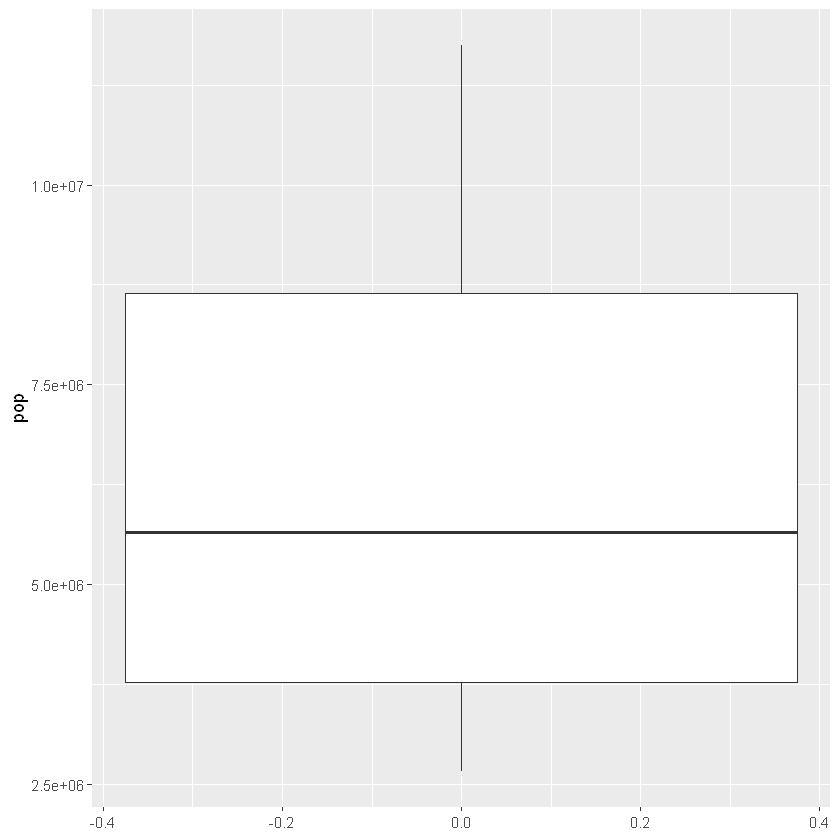

In [31]:
crop=ggplot(data=zambia, mapping=aes(y=pop))+geom_boxplot()
crop